## Limits on Heavy Neutrinos

This notebook plots the standard parameter space of heavy neutrinos under the assumption of single flavor dominance.

The data is pulled from the Google Sheets url, and limits are drawn from digitized or shared data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from Nlimits import plot_tools
from Nlimits import hnl_tools


In [3]:
case_electron = hnl_tools.limits(flavor='e', invisible=False)
case_muon = hnl_tools.limits(flavor='mu', invisible=False)
case_tau = hnl_tools.limits(flavor='tau', invisible=False)

background_grey = plot_tools.lighten_color('lightgrey', 0.3)

x=np.geomspace(1,1e5,100000)


nuexps = ['t2k','t2k_lowmass', 'microboone_higgs', 'nomad',
            'argoneut','charm_2021','nomad','nutev','borexino_plestid',
            'charm','charmii', 'dune_berryman', 'dune_ballett','microboone','sk', 'ship']


In [30]:
def std_plot_limits(case, skip_ids=[], xrange=(5, 1e5), yrange=(1e-10,1e-1), title=None, 
        new_labelpos={}, new_color={}, new_dash={}, nf03=False):

    fig, ax = plot_tools.std_fig(figsize=(8,4), ax_form=[0.1,0.125,0.88,0.81])

    # sns.reset_orig()  # get default matplotlib styles back
    labelpos_dic={}
    for i, limit in case.limits.iterrows():
        ilabel, ival = np.nanargmin(limit.interp_func(x)), np.nanmin(limit.interp_func(x))
        labelpos_dic[limit.id] = (x[ilabel]*0.9, ival/2.5)
    color_dic = dict(zip(case.limits['id'],sns.color_palette('tab10', n_colors=len(list(case.limits.iterrows()))))) # a list of RGB tuples
    dash_dic = dict(zip(case.limits['id'], (1+len(color_dic.keys()))*[(1,0)]))
    
    labelpos_dic.update(new_labelpos)
    color_dic.update(new_color)
    dash_dic.update(new_dash)

    for i, limit in case.limits.iterrows():
        if limit.id not in skip_ids:
            
            if nf03:
                if limit.id in nuexps:
                    c = color_dic[limit.id]
                    LW = 1
                    alpha=1
                else:
                    c = 'black'
                    LW=0.5
                    alpha=0.5
            else:
                c = color_dic[limit.id]
                alpha=1
                LW = 1

            if (limit.year is None):
                dash = (4,2)
            else:
                dash = dash_dic[limit.id]

            label = fr'\noindent {limit.plot_label}'.replace("(",r" \noindent {\tiny \textsc{(").replace(")", r")} }").replace(r'\\', r"\vspace{-2ex} \\ ")
            ax.plot(x, limit.interp_func(x), zorder=3, color=c, dashes=dash, lw=LW)
            ax.plot(x, limit.interp_func_top(x), color=c, dashes=dash,zorder=2, lw=LW)
            if ('bbn' not in limit.id) and (limit.year is not None):
                ax.fill_between(x, limit.interp_func(x), x/x,  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
                # ax.fill_between(x, limit.interp_func(x), limit.interp_func_top(x),  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
            t = ax.annotate(label, xy=labelpos_dic[limit.id], xycoords='data', color=c, zorder=4, fontsize=7.5)
            # t.set_bbox(dict(facecolor=background_grey, alpha=0.2, edgecolor='None'))

    ax.set_yscale("log")
    ax.set_xscale("log")


    ax.set_ylabel(fr"{case.latexflavor}")
    ax.set_xlabel(fr"$m_N/$MeV")

    major=np.array([1e-12,1e-11, 1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
    minor=np.array([2,3,4,5,6,7,8,9])
    minor = np.array([m*minor for m in major]).flatten()[:-9]
    ax.set_yticks(major)
    ax.set_yticks(minor, minor=True)

    ax.grid(axis='y', which='both', dashes=(6,1), alpha=0.25, c='black', lw=0.2)
    ax.grid(axis='x', which='both', dashes=(6,1), alpha=0.25, c='black', lw=0.2)

    ax.set_ylim(*yrange)
    ax.set_xlim(*xrange)
    ax.set_title(title)
    
    suffix = '_nf03' if nf03 else ''
    plot_tools.std_savefig(fig, path = f'plots/U{case.flavor}N{suffix}.pdf')
    
    return fig, ax 


## $|U_{e N}|^2$

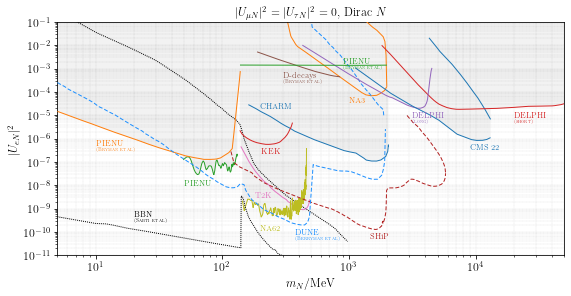

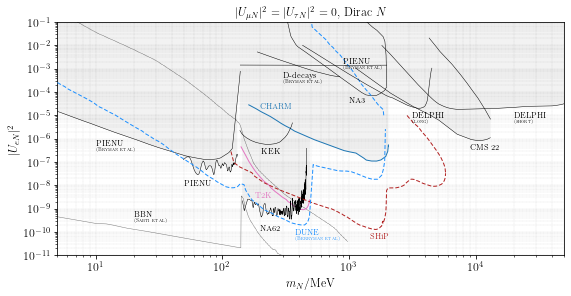

In [42]:

kwargs = {'xrange': (5,5e4),
        'yrange': (1e-11,1e-1),
        #
        'skip_ids': ['dune_ballett','fmmf','bebc'],
        #
        'title': fr"$|U_{{\mu N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$",
        #
        'new_color': {'bbn': 'black',
        'microboone_higgs': 'green',
        't2k_lowmass': 'blue',
        'dune_berryman': 'dodgerblue',
        'ship': 'firebrick'},
        #
        'new_dash': {'bbn': (1,1)},
        #
        'new_labelpos': {
                    'bbn': (20, 4.5e-10),
                    't2k': (180, 3e-9),
                    'na62': (200, 1.2e-10),
                    'na3': (1.e3, 3.5e-5),
                    'charm': (200, 2e-5),
                    'delphi_short': (2e4, 8e-6),
                    'pienu': (50, 1e-8),
                    'pienu_highmass': (900, 1.6e-3),
                    'pienu_lowmass': (10, 0.5e-6),
                    'de2_bryman_shrock': (300, 4e-4)}
        }


fig, ax = std_plot_limits(case_electron, **kwargs)

fig, ax = std_plot_limits(case_electron, nf03=True,  **kwargs)


## $|U_{\mu N}|^2$

In [59]:
kwargs = {'xrange': (5,5e4),
                            #
                            'skip_ids': ['dune_ballett','fmmf'],
                            #
                            'title': fr"$|U_{{e N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$",
                            #
                            'new_color': {'bbn': 'black',
                            'microboone_higgs': 'green',
                            't2k_lowmass': 'blue',
                            'dune_berryman': 'dodgerblue',
                            'ship': 'firebrick'},
                            #
                            'new_dash': {'bbn': (1,1)},
                            #
                            'new_labelpos': {'bbn': (900, 6e-10),
                            'bebc': (232, 1.15e-4),
                            'charmii': (2e3, 1e-3),
                            'dune_berryman': (90, 8e-9),
                            'delphi_short': (2e4, 8e-6),
                            'ewpo': (1e4, 2e-3),
                            'fmmf': (500, 1e-5),
                            'ktev': (300, 2e-6),
                            'kek': (270, 1.7e-6),
                            'lepton_universality': (1e4, 5e-4),
                            'muon_decays': (90, 1e-2),
                            'microboone': (280, 3.5e-8),
                            'microboone_higgs': (50, 3e-4),
                            'nutev': (500, 1e-6),
                            'na62': (130, 4e-8),
                            'pienu': (10, 1.5e-6),
                            'sk': (120,0.4e-4),
                            'sin': (10, 3e-5),
                            't2k_lowmass': (40,7.5e-6),
                            }
        }


fig, ax = std_plot_limits(case_muon, **kwargs)

fig, ax = std_plot_limits(case_muon, nf03=True,  **kwargs)



## $|U_{\tau N}|^2$

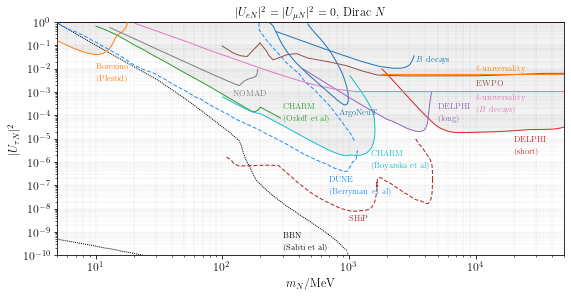

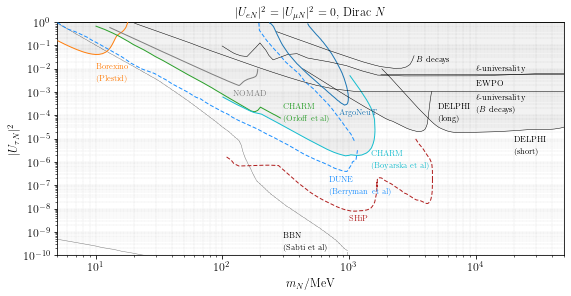

In [111]:
kwargs = {'xrange': (5,5e4),
                            'yrange': (1e-10,1),
                            #
                            'skip_ids': ['dune_ballett','fmmf','bebc','t2k'],
                            #
                            'title': fr"$|U_{{e N}}|^2 = |U_{{\mu N}}|^2 = 0$, Dirac $N$",
                            #
                            'new_color': {
                            't2k': 'grey',
                            'bbn': 'black',
                            'dune_berryman': 'dodgerblue',
                            'ship': 'firebrick'}
                            ,
                            #
                            'new_dash': {
                                    'bbn': (1,1),
                                    't2k': (1,1)
                                    },
                            #
                            'new_labelpos': {'bbn': (300, 6e-10),
                                        'charm': (300, 2e-4),
                                        'charm_2021': (1.5e3, 2e-6),
                                        'dune_berryman': (0.7e3, 1.5e-7),
                                        'borexino_plestid': (10,1e-2),
                                        'lepton_universality_2': (1e4,8e-3),
                                        'b_decays': (3.4e3, 2e-2),
                                        'delphi_short': (2e4, 8e-6),
                                        'delphi_long': (5e3, 2e-4),
                                        'lepton_universality': (1e4, 5e-4),
                                        'ewpo': (1e4, 2e-3)
                                        }
}


fig, ax = std_plot_limits(case_tau, **kwargs)

fig, ax = std_plot_limits(case_tau, nf03=True,  **kwargs)

In [83]:
import pylatex
from pylatex import Document, Section, Subsection, Command
from pylatex.utils import italic, NoEscape


def add_plot(doc, case):

    # caption with the citations
    citations = fr"Constraints on {case.latexflavor} as a function of the HNL mass $m_N$. Limits shown: "
    names = sorted(case.limits.plot_label)
    for name in names:
        citations += fr'{name}~\cite{{{list(case.limits.reference[case.limits.plot_label == name])[0]}}}, '.replace('\\\\','')
    citations = citations[:-2]+'.'

    # figure
    with doc.create(pylatex.Figure(position='h!')) as latexfig:
        latexfig.add_image(f'../plots/U{case.flavor}N.pdf', width=NoEscape(r'1\textwidth'))
        latexfig.add_caption(NoEscape(citations))


# Basic document
doc = Document('pylatex/article', documentclass=NoEscape(r'revtex4-2'))
add_plot(doc, case_electron)
add_plot(doc, case_muon)
add_plot(doc, case_tau)

doc.append(pylatex.Command('bibliographystyle', arguments=NoEscape(r'apsrev4-1')))
doc.append(pylatex.Command('bibliography', arguments='article'))

doc.generate_pdf(clean_tex=False)
doc.generate_tex()